# Dogs vs Cats

First let's import Keras from TensorFlow

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!gdown https://drive.google.com/uc?id=1_yvlx002Q-Vu4Z7W_hUasQdlFCjZbktH

Downloading...
From: https://drive.google.com/uc?id=1_yvlx002Q-Vu4Z7W_hUasQdlFCjZbktH
To: /content/dogs-vs-cats.zip
852MB [00:11, 74.9MB/s]


In [3]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [4]:
!unzip -qq train.zip

In [5]:
!unzip -qq test1.zip

In [7]:
import shutil
import os

os.makedirs('dogscats/train/cat')
os.makedirs('dogscats/train/dog')
os.makedirs('dogscats/valid/cat')
os.makedirs('dogscats/valid/dog')

files = os.listdir('train')

i = 0

for file in files:
    print(i, len(files))
    if i < 20000:
        if file.startswith('cat'):
            shutil.copy('train/' + file, 'dogscats/train/cat')
        else:
            shutil.copy('train/' + file, 'dogscats/train/dog')
    else:
        if file.startswith('cat'):
            shutil.copy('train/' + file, 'dogscats/valid/cat')
        else:
            shutil.copy('train/' + file, 'dogscats/valid/dog')
    i = i + 1

Streaming output truncated to the last 5000 lines.
20000 25000
20001 25000
20002 25000
20003 25000
20004 25000
20005 25000
20006 25000
20007 25000
20008 25000
20009 25000
20010 25000
20011 25000
20012 25000
20013 25000
20014 25000
20015 25000
20016 25000
20017 25000
20018 25000
20019 25000
20020 25000
20021 25000
20022 25000
20023 25000
20024 25000
20025 25000
20026 25000
20027 25000
20028 25000
20029 25000
20030 25000
20031 25000
20032 25000
20033 25000
20034 25000
20035 25000
20036 25000
20037 25000
20038 25000
20039 25000
20040 25000
20041 25000
20042 25000
20043 25000
20044 25000
20045 25000
20046 25000
20047 25000
20048 25000
20049 25000
20050 25000
20051 25000
20052 25000
20053 25000
20054 25000
20055 25000
20056 25000
20057 25000
20058 25000
20059 25000
20060 25000
20061 25000
20062 25000
20063 25000
20064 25000
20065 25000
20066 25000
20067 25000
20068 25000
20069 25000
20070 25000
20071 25000
20072 25000
20073 25000
20074 25000
20075 25000
20076 25000
20077 25000
20078 25000
2

In [8]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=(1/255.))

In [9]:
train_generator = datagen.flow_from_directory(
        "./dogscats/train",
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        "./dogscats/valid",
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
sample, _ = next(train_generator)

In [11]:
sample.shape

(64, 64, 64, 3)

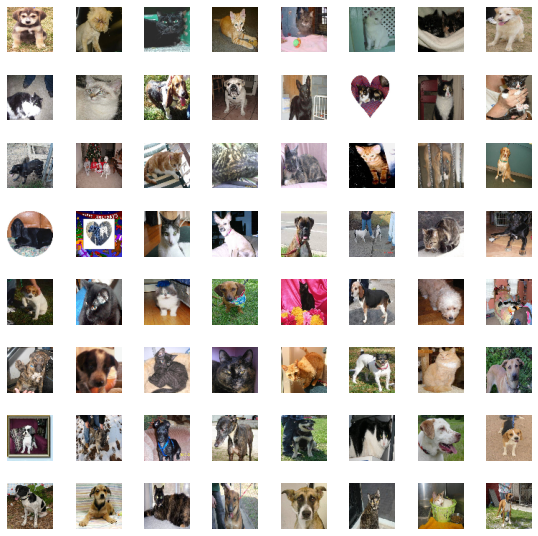

In [12]:
n_rows = 8
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(sample[index])
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, 3, activation='relu', input_shape=[64, 64, 3]))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Conv2D(256, 3, activation='relu'))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Conv2D(64, 3, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        147520    
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
history = model.fit(train_generator, 
                    epochs=30, 
                    steps_per_epoch=20000//64, 
                    validation_data=validation_generator, 
                    validation_steps=5000//64)

Epoch 1/30
312/312 [==============================] - 92s 199ms/step - loss: 0.6914 - accuracy: 0.5293 - val_loss: 0.6848 - val_accuracy: 0.5573
Epoch 2/30
312/312 [==============================] - 61s 196ms/step - loss: 0.6815 - accuracy: 0.5727 - val_loss: 0.6691 - val_accuracy: 0.5897
Epoch 3/30
312/312 [==============================] - 61s 196ms/step - loss: 0.6686 - accuracy: 0.5840 - val_loss: 0.6575 - val_accuracy: 0.6010
Epoch 4/30
312/312 [==============================] - 61s 196ms/step - loss: 0.6547 - accuracy: 0.6038 - val_loss: 0.6501 - val_accuracy: 0.6098
Epoch 5/30
312/312 [==============================] - 61s 196ms/step - loss: 0.6462 - accuracy: 0.6203 - val_loss: 0.6266 - val_accuracy: 0.6605
Epoch 6/30
312/312 [==============================] - 62s 197ms/step - loss: 0.6359 - accuracy: 0.6349 - val_loss: 0.6251 - val_accuracy: 0.6536
Epoch 7/30
312/312 [==============================] - 61s 196ms/step - loss: 0.6261 - accuracy: 0.6451 - val_loss: 0.6057 - val_ac

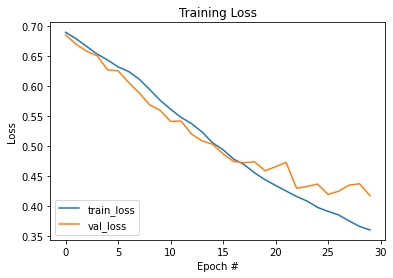

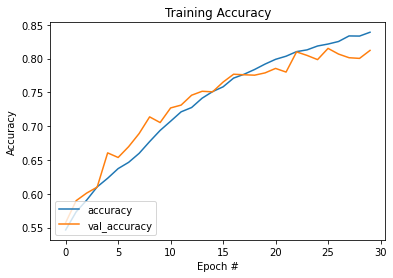

In [25]:
N = range(0, 30)
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

plt.figure()
plt.plot(N, history.history["accuracy"], label="accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [26]:
model.save("dogscats_model.h5")